 N 3072
1
1


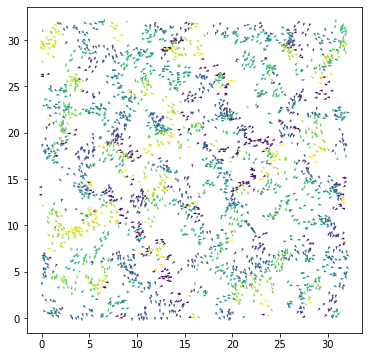

In [1]:
import numpy as np
import scipy as sp
from scipy import sparse
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
 
 
L = 32.0
rho = 3.0
N = int(rho*L**2)
print(" N",N)
 
r0 = 1.0
deltat = 1.0
factor =0.5
v0 = r0/deltat*factor
iterations = 10000
eta = 0.15
 
 
pos = np.random.uniform(0,L,size=(N,2))
orient = np.random.uniform(-np.pi, np.pi,size=N)
 
fig, ax= plt.subplots(figsize=(6,6))
 
qv = ax.quiver(pos[:,0], pos[:,1], np.cos(orient[0]), np.sin(orient), orient, clim=[-np.pi, np.pi])
 
def animate(i):
    print(i)
 
    global orient
    tree = cKDTree(pos,boxsize=[L,L])
    dist = tree.sparse_distance_matrix(tree, max_distance=r0,output_type='coo_matrix')
 
    #important 3 lines: we evaluate a quantity for every column j
    data = np.exp(orient[dist.col]*1j)
    # construct  a new sparse marix with entries in the same places ij of the dist matrix
    neigh = sparse.coo_matrix((data,(dist.row,dist.col)), shape=dist.get_shape())
    # and sum along the columns (sum over j)
    S = np.squeeze(np.asarray(neigh.tocsr().sum(axis=1)))
     
     
    orient = np.angle(S)+eta*np.random.uniform(-np.pi, np.pi, size=N)
 
 
    cos, sin= np.cos(orient), np.sin(orient)
    pos[:,0] += cos*v0
    pos[:,1] += sin*v0
 
    pos[pos>L] -= L
    pos[pos<0] += L
 
    qv.set_offsets(pos)
    qv.set_UVC(cos, sin,orient)
    return qv,
 
anim = FuncAnimation(fig,animate,np.arange(1, 200),interval=1, blit=True)
# plt.show()